## DECam $(g-i)$ analysis:
Version 26 Aug 2024, J. Jensen: added extinction uncertainty (default 10% of gext and iext)

DECam images should have already been retrieved and processed using Downloads_DECam script. 

This script gets the extinction values from NED. 
The script uses SExtractor to identify stars and other objects, and make a mask automatically. 
It looks for an existing DECam mask for large or saturated objects and other image defects.

It does a quick elliprof fit to the galaxy and mask off the main galaxy and look at the residual background level well away from the galaxy (much larger FOV than WFC3/IR). The script sets default r1 for elliprof to be image size/20 = 75 to 250 depending on the size of the galaxy/image. You can also set it manually. If the elliprof fit fails for whatever reason, you can also just make a mask manaully, save it to the top-level directory (usually as n1234dc.mask), replace the DC_Outputs_n1234/n1234.mask with the manual mask, and set resetSEmask = False.

The script uses SExtractor to identify stars and other objects, and make a mask automatically. 
It looks for an existing DECam mask for large or saturated objects and other image defects.

Generate the $(g-i)$ color map by subtracting sky, calculating $-2.5\log f$, correcting for extinction, and subtracting to get $(g-i)$. Units are AB mag.

The last step is to use monsta “fluc mask” command to make the circular annuli in the same sizes as the SBF analysis and write the median and average values to a text file. Averages are computed within a data range of +/-0.15 mag of the median value within the inner two annuli. If the max and min computed this way fall outside the range 0.5 to 2, then these values are used.

DECam images have 0.2637 arcsec/pix center, 0.2626 edge; these galaxies could be anywhere
on the original camera, so we use 0.263 arcsec pixels.

## Installing Required Python Packages

In [1]:
import sys, os
 
# path of the pysbf folder
# sys.path.insert(0, os.getcwd()+"/../../")
 
pysbf_path = "/Users/Joe/data/sbf/"

# Name convention for manually-created masks, if any:
DC_manual = 'dc.mask'

sys.path.insert(0, pysbf_path)
from pysbf import *
 
configFolder = pysbf_path + "pysbf/config/sextractor/"
resetSEmask = False

In [2]:
## Extinction uncertainty

In [3]:
# Fractional uncertainty to assign to extinction values
extfrac = 0.1

## Object Initialization

In [4]:
# This is the radial region to fit with elliprof. Set to zero for automatic calculation. Set to explicit value if the default value doesn't work well.
r1 = str(0)
# Radial region to use for measuring the background. Set to zero for automatic calculation.
rsky = str(0)

# Location for the DECam calibrator images
# DC_root = '/Users/Joe/data/DECam/'
#----FCS calibrators---- (11712)
# name = "ic1919"
# name = "ic2006"
# name = "n1344"
# name = "n1374"; r1=str(200)
# name = "n1375"; r1=str(120)
# name = "n1380"; r1=str(150)
# name = "n1399"
# name = "n1404"
#----VCS Calibrators----
#name = "ic0798"; r1=str(80)
#name = "ic0809"; r1=str(80)
#name = "ic3019"
# name = "ic3025"; r1=str(120)
# name = "ic3032"; r1=str(80)
#name = "ic3065"; r1=str(120)
#name = "ic3101"
#name = "ic3292"; r1=str(100)
#name = "ic3328"; r1=str(80)
#name = "ic3381"; r1=str(150)
#name = "ic3383"
#name = "ic3442"
#name = "ic3461" 
#name = "ic3468"; r1=str(80)
#name = "ic3470"; r1=str(80)
# name = "ic3487"
# name = "ic3490"
# name = "ic3492" # 0 1 1 (dusty center?)
# name = "ic3501"
# name = "ic3509"
# name = "ic3586"; r1=str(90)
# name = "ic3602"; r1=str(30) # something's wrong with this one
# name = "ic3612"; r1=str(100)
# name = "ic3633"; r1=str(80)
# name = "ic3635"; r1=str(80)
# name = "ic3647"; r1=str(90)
# name = "ic3652"
# name = "ic3653"
# name = "ic3735"; r1=str(120)
# name = "ic3773"
# name = "ic3779"; r1=str(120)
# name = "n4262"; r1=str(110) # 0 0 1 (complex center)
# name = "n4267"; r1=str(120)
# name = "n4309a"
# name = "n4318"
# name = "n4340"; r1=str(80) # 1 1 0; ring galaxy
# name = "n4350"; r1=str(200) # disk galaxy
# name = "n4352"
# name = "n4371"; r1=str(100) # disky galaxy, ring/bar/warp (use dc.mask only)
# name = "n4377"
# name = "n4379"; r1=str(120)
# name = "n4387"
# name = "n4417"; r1=str(100) # use dc.mask only
# name = "n4434"; r1=str(100)
# name = "n4435" # dusty interacting galaxy
# name = "n4452"; r1=str(100) # thin edge on disk
# name = "n4458" # g-i needs additional mask
# name = "n4464"
# name = "n4467"
# name = "n4472"; r1=str(300)
# name = "n4474"
# name = "n4476"
# name = "n4478"
# name = "n4479"
# name = "n4482"
# name = "n4483"
# name = "n4486a"
# name = "n4486b"; r1=str(60)
# name = "n4489"; r1=str(150)
# name = "n4515"; r1=str(120)
# name = "n4528"; r1=str(100)
# name = "n4550"; r1=str(150)
# name = "n4551"
# name = "n4564"
# name = "n4570"
# name = "n4578"
# name = "n4612"; r1=str(80)
# name = "n4623"
# name = "n4638"
# name = "n4649"; r1=str(250)
# name = "n4660"
# name = "u7399a"
# name = "u7436"
# name = "u7580"
# name = "u7584"; r1=str(80) # something's wrong with this one
# Coma 11711
# name = "n4874"
# GWS
# name = "n4993"; r1=str(120)

# ---------SNAP28----------
# DC_root = '/Users/Joe/data/wfc3-16262/DECam/'  # for SNAP-28
# name = "WISEAJ192159.44-600234.4"; r1=str(80) # aka 2MASS-J19215490-6003146
# name = "WISEAJ125011.54-411315.5"; r1=str(90) # aka "2MASS-J12501152-4113155" (bad)
# name = "eso185-g054"; r1=str(90)
# name = "eso235-g049"
# name = "eso399-g010"; r1=str(80)
# name = "eso436-g045"; r1=str(60)
# name = "eso507-g025"; r1=str(100)
# name = "ic4727"
# name = "ic4794"; r1=str(80)
# name = "ic4798"; r1=str(150) # dust lanes; use DC mask alone
# name = "ic4926"
# name = "ic4956"; r1=str(100)
# name = "ic5105"
# name = "n0080"
# name = "n0380"; r1=str(100)
# name = "n0439"
# name = "n1490"
# name = "n4373"
# name = "n6407"; r1=str(70)
# name = "n6653"; r1=str(100)
# name = "n6739" # use dc.mask only; elliprof fits won't work
# name = "n6768"; r1=str(80)
# name = "n6841"
# name = "n6861"
# name = "n6868"
# name = "n7014"
# name = "pgc63905"
# name = "eso461-g007"
# name = "eso462-g015"
# name = "n0750" # use dc.mask only (double galaxy)
# name = "n2418"
# name = "n2569"
# name = "n3070"
# name = "n3091"
# name = "n3308"; r1=str(80)
# name = "n3311"; r1=str(170)
# name = "n4825"
# name = "n4955"; r1=str(120)
# name = "n6577" # Most of the galaxy is missing from the z image; turned off elliprof and SExtractor
# name = "n6968"
# name = "pgc158229"
# name = "pgc170207"

# ---------SNAP31----------
# DC_root = '/Users/Joe/data/wfc3-17436/DECam/'  # for SNAP-31
# name = "n4782" # use dc.mask only. Double galaxy
# name = "n5357"; r1=str(100)
# name = "ic4842"; r1=str(100)
# name = "n3222"
# name = "n3771"; r1=str(100)
# name = "n6375"; r1=str(100)
# name = "n6442"; r1=str(100)
# name = "n0641"
# name = "eso153-g003"
# name = "eso141-g003"
# name = "u12179"
# name = "n0071"; r1=str(70) # use dc.mask only. Multiple companions and interactions

# ----------SN31-----------
# DC_root = '/Users/Joe/data/wfc3-17446/DECam/'  # for SN-31
# name = "cgcg-005-038"; r1=str(60)
# name = "cgcg-031-049"
##name = "eso352-g057"
# name = "eso442-g015"; r1=str(80)
# name = "eso479-g007"; r1=str(80)
# name = "mcg-02-33-017"; r1=str(80) # spiral structure
# name = "cgcg-097-050"
# name = "u00402"; r1=str(80) # use DC mask only
# name = "n1209"
# name = "n3332"
# name = "n3643"
# name = "n4169"
# name = "n4415"; r1=str(120)
# name = "n4636"
# name = "n4767"; r1=str(120)
# name = "n5018" # dusty one
# name = "n5222" # use dc.mask only; annuli are miscentered due to companion
# name = "n5304"
# name = "n5419"
# name = "n7187"; r1=str(120) # use dc.mask only; coordinates are a little off

# This flag should be set to True while generating and fixing masks.
# Comment out this line once the masks are good, for re-running later (False by default).
# resetSEmask = True

In [5]:
outFolder = DC_root + name + '/DC_Outputs_' + name + '/'
createDir(outFolder)
g_fits = DC_root + name + '/' + name + '_g.fits'
i_fits = DC_root + name + '/' + name + '_i.fits'
    
DC_mask = DC_root + name + '/' + name + '.mask'
if not os.path.exists(DC_mask):
    DC_mask = outFolder + '/' + name + '.mask' 
DC_manual = DC_root + name + '/' + name + DC_manual
DC_skymask = outFolder + '/' + name + 'dcsky.mask'
DC_circlemask = configFolder + 'dccircle.mask'

print("DECam files: ", g_fits, '  ', i_fits)

hdul = fits.open(g_fits)
hdr = hdul[0].header     # header

ra  = hdr["CRVAL1"]
dec = hdr["CRVAL2"]
nx = hdr["NAXIS1"]
ny = hdr["NAXIS2"]
xcenter = str(int(nx/2))
ycenter = str(int(ny/2))
xsize = str(nx)
ysize = str(ny)
if r1 == "0" :
    r1 = str(nx/20)
if rsky == "0":
    rsky = str(nx/3)

#print("RA [deg]: ",  ra)
#print("Dec [deg]: ", dec)
print("Size: ", nx, "x", ny)
#print("center: ", xcenter,ycenter)
print("r1 = ", r1, "  rsky = ", rsky)


DECam files:  /Users/Joe/data/wfc3-17446/DECam/n4636/n4636_g.fits    /Users/Joe/data/wfc3-17446/DECam/n4636/n4636_i.fits
Size:  5000 x 5000
r1 =  250.0   rsky =  1666.6666666666667


### Get Galaxy Extinction Info
Here, all we need is to have the coordinates of the galaxy

In [6]:
df_extinction = get_extinction(ra, dec)
df_extinction.set_index("Bandpass", inplace=True)

DECam_rows = [band for band in df_extinction.index.values if "DES" in band]
df_extinction.loc[DECam_rows]

extinctions = df_extinction["The Galactic extinction"]
gext = extinctions["DES g"]
iext = extinctions["DES i"]
sigmaext = (extfrac*gext)**2 + (extfrac*iext)**2

print("Galactic Extinction (DES g): ", gext)
print("Galactic Extinction (DES i): ", iext)
print("(g-i) extinction uncertainty: ", np.sqrt(sigmaext))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Galactic Extinction (DES g):  0.093
Galactic Extinction (DES i):  0.046
(g-i) extinction uncertainty:  0.010375451797391765


100  4294    0  4294    0     0  16084      0 --:--:-- --:--:-- --:--:-- 16142


## Custom circles and sky mask
This next block makes a mask of the specified size for measuring the background value and centers the rings for display purposes.

In [7]:
monsta_script = """
    rd 1 '"""+g_fits+"""'
    open 2 nx=8192 ny=8192
    open 3 nx=8192 ny=8192
    ac 3 1.
    fluc 2 3 mask x0=4096 y0=4096 r0=0 r1="""+rsky+"""
    shift 2 dx=-4096 dy=-4096
    shift 2 dx="""+xcenter+""" dy="""+ycenter+"""
    box 1 nx="""+xsize+""" ny="""+ysize+""" cx="""+xcenter+""" cy="""+ycenter+"""
    wind 2 box=1
    di 2 2
    mc 2 -1. 
    ac 2 1.
    wd 2 '"""+outFolder+name+"""dcsky.mask'
    rd 3 '"""+DC_circlemask+"""'
    shift 3 dx=-2500 dy=-2500
    shift 3 dx="""+xcenter+""" dy="""+ycenter+"""
    open 4 nx="""+xsize+""" ny="""+ysize+"""
    ai 4 3
    wd 4 '"""+outFolder+name+"""tempcircle.mask'
"""

run_monsta(monsta_script, 'monsta.pro', 'monsta.log')

'OK'

## Mask and residual image section

This next block is for making masks using Source Extractor.
Please edit the mask if needed and rerun.

In [8]:
# create residual images for Source Extractor
monsta_script = """
    rd 1 '"""+g_fits+"""'
    rd 2 '"""+i_fits+"""'
    clip 1 nan=0
    clip 2 nan=0
    wd 1 '"""+outFolder+name+"""g.nonan'
    wd 2 '"""+outFolder+name+"""i.nonan'
    set nr="""+r1+"""/5$nint
    string nr '%i2.0' nr
    cop 3 1
    cop 4 2
    elliprof 3 model rmstar x0="""+xcenter+""" y0="""+ycenter+""" r0=7 r1="""+r1+""" nr=nr niter=5
    elliprof 4 model rmstar x0="""+xcenter+""" y0="""+ycenter+""" r0=7 r1="""+r1+""" nr=nr niter=5
    cop 5 1
    si 5 3
    cop 6 2
    si 6 4
    wd 5 '"""+outFolder+name+"""g.resid'
    wd 6 '"""+outFolder+name+"""i.resid'
    rd 10 '"""+outFolder+name+"""tempcircle.mask'
    ac 5 500.
    ac 6 500.
    mi 5 10
    mi 6 10
    box 1 nc=550 nr=550 cc="""+xcenter+""" cr="""+ycenter+"""
    wind 5 box=1
    wind 6 box=1
    wd 5 '"""+outFolder+name+"""g.zoom.resid'
    wd 6 '"""+outFolder+name+"""i.zoom.resid'
"""
run_monsta(monsta_script, 'monsta.pro', 'monsta.log')


'OK'

In [9]:
# Run Source Extractor if needed to generate the mask.
monsta_script = """
    rd 7 '"""+outFolder+"""/dcg.obj'
    rd 8 '"""+outFolder+"""/dci.obj'
    di 7 7
    di 8 8
    mi 8 7
    wd 8 '"""+outFolder+name+""".mask' bitmap
"""
sestring_g = outFolder+name+'g.resid -c '+configFolder+'dcg.inpar -CATALOG_NAME '+outFolder+'dcg.cat -PARAMETERS_NAME '+configFolder+'sbf.param -FILTER_NAME '+configFolder+'gauss_2.0_5x5.conv -STARNNW_NAME '+configFolder+'default.nnw -CHECKIMAGE_NAME '+outFolder+'dcg.obj'
sestring_i = outFolder+name+'i.resid -c '+configFolder+'dci.inpar -CATALOG_NAME '+outFolder+'dci.cat -PARAMETERS_NAME '+configFolder+'sbf.param -FILTER_NAME '+configFolder+'gauss_2.0_5x5.conv -STARNNW_NAME '+configFolder+'default.nnw -CHECKIMAGE_NAME '+outFolder+'dci.obj'
    
if resetSEmask or not os.path.exists(DC_mask):
    DC_mask = outFolder + name + '.mask'
    print('Creating ' + DC_mask + ' now.')
    print('Please edit it if necessary and save it as')
    print(DC_manual,'before proceeding.')
    ! sex {sestring_g}
    ! sex {sestring_i}
    run_monsta(monsta_script, 'monsta.pro', 'monsta.log')


In [10]:
# Multiply mask by existing manual mask, if it exists
monsta_script = """
    rd 1 '"""+DC_mask+"""'
    rd 2 '"""+DC_manual+"""'
    mi 1 2
    wd 1 '"""+DC_mask+"""' bitmap
"""

if os.path.exists(DC_manual):
    run_monsta(monsta_script, 'monsta.pro', 'monsta.log')
    print('Including manually-created mask ',DC_manual)

Including manually-created mask  /Users/Joe/data/wfc3-17446/DECam/n4636/n4636dc.mask


In [11]:
# Multiply residual images by mask for display
monsta_script = """
    rd 1 '"""+outFolder+name+"""g.resid'
    rd 2 '"""+outFolder+name+"""i.resid'
    rd 10 '"""+DC_mask+"""' bitmap 
    mi 1 10
    mi 2 10
    wd 1 '"""+outFolder+name+"""g.resid'
    wd 2 '"""+outFolder+name+"""i.resid'
    rd 9 '"""+DC_skymask+"""'
    rd 10 '"""+outFolder+name+"""tempcircle.mask'
    ac 1 20.
    ac 2 20.
    mi 1 10
    mi 2 10
    mi 9 2
    box 1 nc=550 nr=550 cc="""+xcenter+""" cr="""+ycenter+"""
    wind 1 box=1
    wind 2 box=1
    wd 1 '"""+outFolder+name+"""g.zoom.resid'
    wd 2 '"""+outFolder+name+"""i.zoom.resid'
    wd 9 '"""+outFolder+name+"""tempsky.resid'
"""
run_monsta(monsta_script, 'monsta.pro', 'monsta.log')


'OK'

In [12]:
# Source Extractor test cell - uncomment to see if SExtractor is working.
# ! sex {sestring_g}

Text(0.5, 1.0, 'Sky Mask')

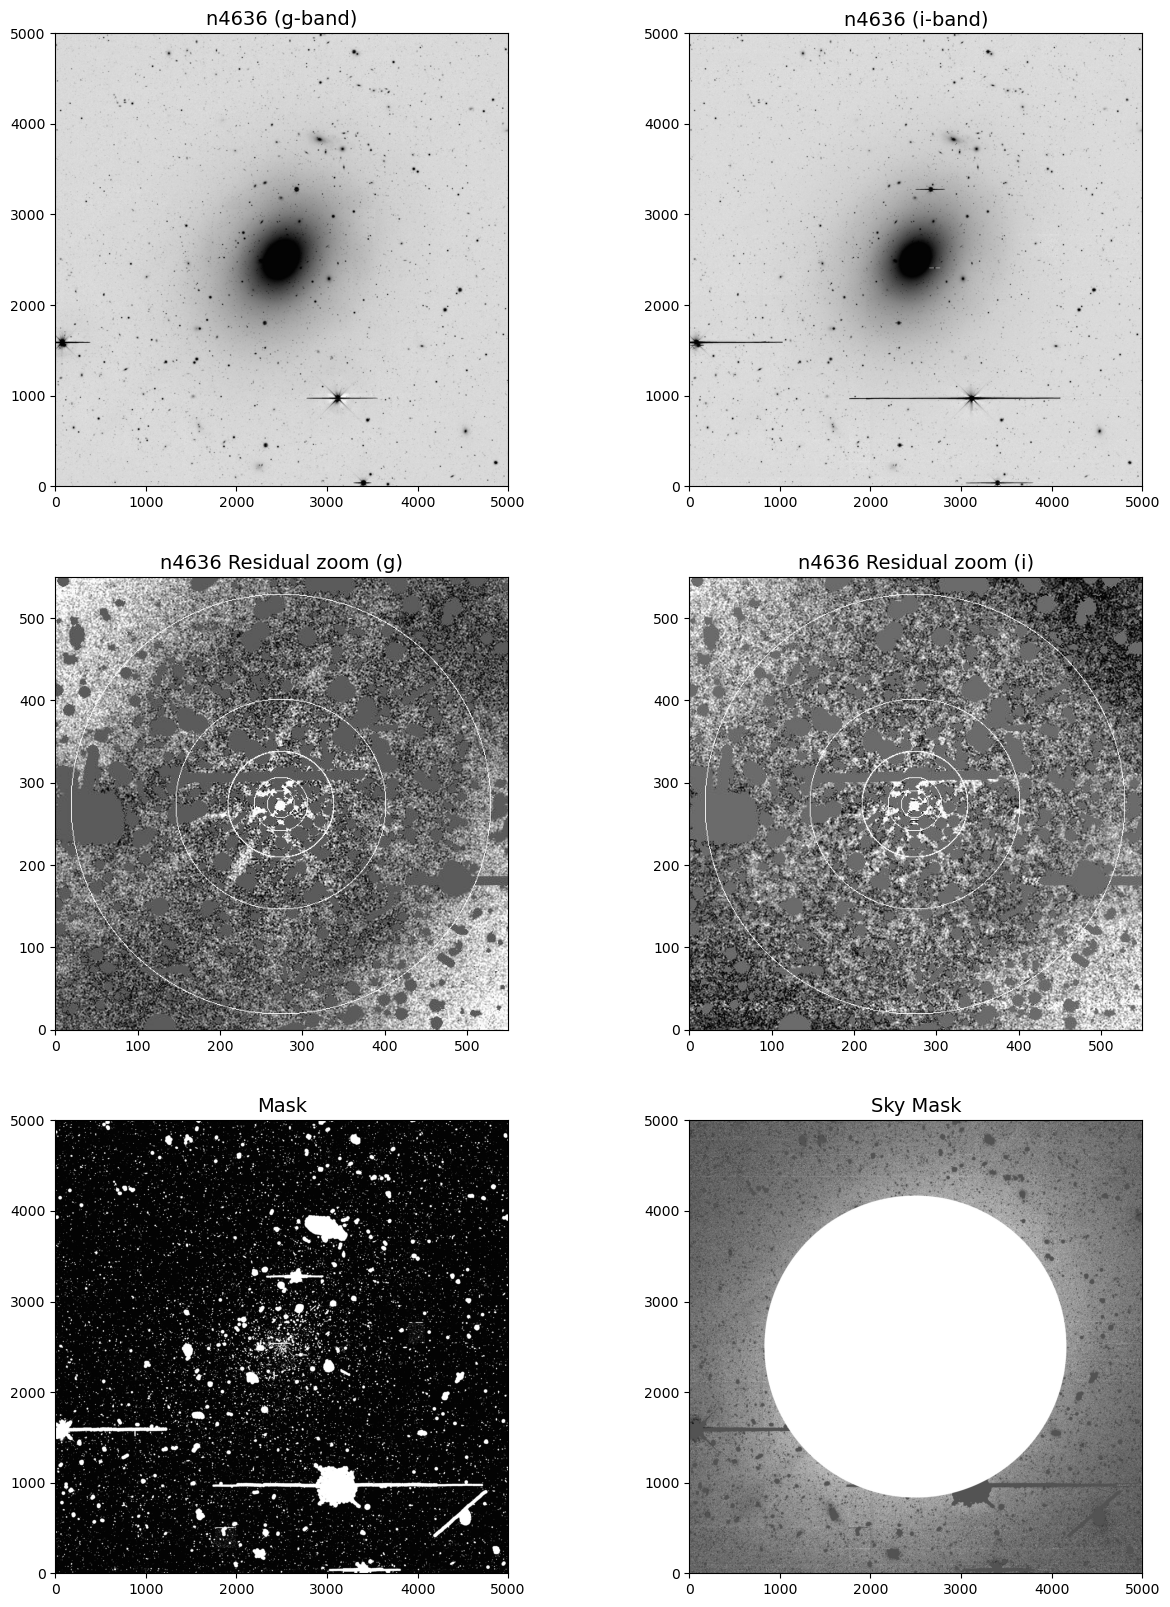

In [13]:
#DC_newmask = outFolder+name+".mask"

plt.figure(figsize=(15,20))

plt.subplot(321)
ax = plt.gca()
tv(outFolder+name+'g.nonan',ax=ax, options='sqrt')
ax.set_title(name + " (g-band)", fontsize=14)

plt.subplot(322)
ax = plt.gca()
tv(outFolder+name+'i.nonan',ax=ax, options='sqrt')
ax.set_title(name + " (i-band)", fontsize=14)

plt.subplot(325)
ax = plt.gca()
tv(DC_mask,ax=ax)
ax.set_title("Mask", fontsize=14)

plt.subplot(323)
ax = plt.gca()
tv(outFolder+name+"g.zoom.resid",ax=ax, options='')
ax.set_title(name + " Residual zoom (g)", fontsize=14)

plt.subplot(324)
ax = plt.gca()
tv(outFolder+name+"i.zoom.resid",ax=ax, options='')
ax.set_title(name + " Residual zoom (i)", fontsize=14)

plt.subplot(326)
ax = plt.gca()
#tv(DC_skymask,ax=ax)
tv(outFolder+name+"tempsky.resid",ax=ax, options='')
ax.set_title("Sky Mask", fontsize=14)


## Set up the color information file

In [14]:
import json

def save_colors(monsta_log="monsta.log"):
    
    outdict = {}
    radii = []
    background = []
    median = []
    average = []
    medrms = []
    medsig = []
    avrms = []
    avsig = []
    outdict["Radii"] = radii
    outdict["Background"] = background
    outdict["Average colors"] = average
    outdict["Median colors"] = median
    outdict["Average rms"] = avrms
    outdict["Average sigma (including extinction uncertainty)"] = avsig
    outdict["Median rms"] = medrms
    outdict["Median sigma (including extinction uncertainty)"] = medsig

    with open("monsta.log", "r") as f:
        lines = f.readlines()

    for l in lines:
        l0 = l.strip()
        l00 = l0.split()

        if l00:
            if "Galaxy" in l0:
                outdict["name"] = l00[1]
                outdict["color"] = "DECam g-i"
            if "SKYG" in l0:
                background.append({"Background g": float(l00[2])})
            if "SKYI" in l0:
                background.append({"Background i": float(l00[2])})
            if "Unity" in l0:
                radii.append({"Average_radius": float(l00[6])})
            if "AVC0RMS" in l0:
                avrms.append({"Average c0 rms": float(l00[2])})
            elif "AVC0SIG" in l0:
                avsig.append({"Average c0 sigma": float(l00[2])})
            elif "AVC0" in l0:
                average.append({"Average c0": float(l00[2])})
            if "AVC1RMS" in l0:
                avrms.append({"Average c1 rms": float(l00[2])})
            elif "AVC1SIG" in l0:
                avsig.append({"Average c1 sigma": float(l00[2])})
            elif "AVC1" in l0:
                average.append({"Average c1": float(l00[2])})
            if "AVC2RMS" in l0:
                avrms.append({"Average c2 rms": float(l00[2])})
            elif "AVC2SIG" in l0:
                avsig.append({"Average c2 sigma": float(l00[2])})
            elif "AVC2" in l0:
                average.append({"Average c2": float(l00[2])})
            if "AVC5RMS" in l0:
                avrms.append({"Average c5 rms": float(l00[2])})
            elif "AVC5SIG" in l0:
                avsig.append({"Average c5 sigma": float(l00[2])})
            elif "AVC5" in l0:
                average.append({"Average c5": float(l00[2])})
            if "MEDC0RMS" in l0:
                medrms.append({"Median c0 rms": float(l00[1])})
            elif "MEDC0SIG" in l0:
                medsig.append({"Median c0 sigma": float(l00[1])})
            elif "MEDC0" in l0:
                median.append({"Median c0": float(l00[2])})
            if "MEDC1RMS" in l0:
                medrms.append({"Median c1 rms": float(l00[1])})
            elif "MEDC1SIG" in l0:
                medsig.append({"Median c1 sigma": float(l00[1])})
            elif "MEDC1" in l0:
                median.append({"Median c1": float(l00[2])})
            if "MEDC2RMS" in l0:
                medrms.append({"Median c2 rms": float(l00[1])})
            elif "MEDC2SIG" in l0:
                medsig.append({"Median c2 sigma": float(l00[1])})
            elif "MEDC2" in l0:
                median.append({"Median c2": float(l00[2])})          
            if "MEDC5RMS" in l0:
                medrms.append({"Median c5 rms": float(l00[1])})
            elif "MEDC5SIG" in l0:
                medsig.append({"Median c5 sigma": float(l00[1])})
            elif "MEDC5" in l0:
                median.append({"Median c5": float(l00[2])})

    json_name = outFolder+name+"_color_dc_gi.json"
    with open(json_name, 'w') as file:
        json_string = json.dumps(outdict, default=lambda o: o.__dict__, sort_keys=True, indent=2)
        file.write(json_string)

        print("Colors are stored in: ", json_name)

    return json_name


## Measure $(g-i)$

In [15]:
monsta_script = """
    string name '"""+name+"""'

    ! make the g-i color map
    rd 1 '"""+g_fits+"""'
    rd 2 '"""+i_fits+"""'
    clip 1 nan=0
    clip 2 nan=0
    cop 3 1
    cop 4 2
    rd 5 '"""+DC_skymask+"""'
    ! read the input DECam mask; if it's not there, read the one that the notebook just made.
    rd 6 '"""+DC_mask+"""'
    mi 5 6
    mi 3 5
    mi 4 5
    cop 10 4
    ! sky values
    abx 3 all median median=skyg silent
    abx 4 all median median=skyi silent
    sc 1 skyg
    sc 2 skyi
    log 1
    mc 1 -2.5
    sc 1 """+str(gext)+"""
    log 2
    mc 2 -2.5
    sc 2 """+str(iext)+"""
    cop 3 1
    si 3 2
    wd 3 '"""+outFolder+name+"""gi.clr'
    cop 10 3
    mi 10 6
    ac 10 2
    rd 7 '"""+outFolder+name+"""tempcircle.mask'
    mi 10 7
    box 1 nc=550 nr=550 cc="""+xcenter+""" cr="""+ycenter+"""
    wind 10 box=1
    wd 10 '"""+outFolder+name+"""gi.zoom.clr'
    close 7
    
    printf 'Galaxy: {name}'
    typ skyg,skyi
    printf ' '

    ! measure the (g-i) values
    cop 1 3
    mi 1 6
    close 6
    open 3 nr=512 nc=512
    fluc 3 1 mask x0="""+xcenter+""" y0="""+ycenter+""" r0=15.6 r1=31.1 a0=0 a1=360 ! c0
    abx 3 all median median=medc0 medrms=medc0rms silent
    set max=2*medc0rms+medc0
    set min=-2*medc0rms+medc0
    clip 3 min=min vmin=0 max=max vmax=0
    abx 3 all mean=avc0 rms=avc0rms silent
    set avc0sig=avc0rms*avc0rms
    set avc0sig=avc0sig+"""+str(sigmaext)+"""$sqrt
    abx 3 all median median=medc0 medrms=medc0rms silent
    set medc0sig=medc0rms*medc0rms
    set medc0sig=medc0sig+"""+str(sigmaext)+"""$sqrt
    wd 3 '"""+outFolder+"""tmpc0.fits'

    open 4 nr=512 nc=512
    fluc 4 1 mask x0="""+xcenter+""" y0="""+ycenter+""" r0=31.1 r1=62.3 a0=0 a1=360 ! c1
    abx 4 all median median=medc1 medrms=medc1rms silent
    set max=2*medc1rms+medc1
    set min=-2*medc1rms+medc1
    clip 3 min=min vmin=0 max=max vmax=0
    abx 4 all mean=avc1 rms=avc1rms silent
    set avc1sig=avc1rms*avc1rms
    set avc1sig=avc1sig+"""+str(sigmaext)+"""$sqrt
    abx 4 all median median=medc1 medrms=medc1rms silent
    set medc1sig=medc1rms*medc1rms
    set medc1sig=medc1sig+"""+str(sigmaext)+"""$sqrt
    wd 4 '"""+outFolder+"""tmpc1.fits'
    
    open 5 nr=512 nc=512
    fluc 5 1 mask x0="""+xcenter+""" y0="""+ycenter+""" r0=62.3 r1=124.6 a0=0 a1=360 ! c2
    abx 5 all median median=medc2 medrms=medc2rms silent
    set max=2*medc2rms+medc2
    set min=-2*medc2rms+medc2
    clip 3 min=min vmin=0 max=max vmax=0
    abx 5 all mean=avc2 rms=avc2rms silent
    set avc2sig=avc2rms*avc2rms
    set avc2sig=avc2sig+"""+str(sigmaext)+"""$sqrt
    abx 5 all median median=medc2 medrms=medc2rms silent
    set medc2sig=medc2rms*medc2rms
    set medc2sig=medc2sig+"""+str(sigmaext)+"""$sqrt
    wd 5 '"""+outFolder+"""tmpc2.fits'
    
    open 6 nr=512 nc=512
    fluc 6 1 mask x0="""+xcenter+""" y0="""+ycenter+""" r0=124.6 r1=249.2 a0=0 a1=360 ! c5
    abx 6 all median median=medc5 medrms=medc5rms silent
    set max=2*medc5rms+medc5
    set min=-2*medc5rms+medc5
    clip 6 min=min vmin=0 max=max vmax=0
    abx 6 all mean=avc5 rms=avc5rms silent
    set avc5sig=avc5rms*avc5rms
    set avc5sig=avc5sig+"""+str(sigmaext)+"""$sqrt
    abx 6 all median median=medc5 medrms=medc5rms silent
    set medc5sig=medc5rms*medc5rms
    set medc5sig=medc5sig+"""+str(sigmaext)+"""$sqrt
    wd 6 '"""+outFolder+"""tmpc5.fits'

! Filter the bad ones (rms>1) by setting them to 0
    if avc0rms>1.0
    set avc0=0.0
    set medc0=0.0
    end_if
    if avc1rms>1.0
    set avc1=0.0
    set medc1=0.0
    end_if
    if avc2rms>1.0
    set avc2=0.0
    set medc2=0.0
    end_if
    if avc5rms>1.0
    set avc5=0.0
    set medc5=0.0
    end_if
    
    printf ' '
    printf '{name} median (g-i) extinction corrected'
    typ medc0,medc1,medc2,medc5
    printf ' '
    typ medc0rms,medc1rms,medc2rms,medc5rms
    printf ' '
    typ medc0sig,medc1sig,medc2sig,medc5sig
    printf ' '
    printf '{name} average (g-i) extinction corrected'
    typ avc0,avc1,avc2,avc5
    printf ' '
    typ avc0rms,avc1rms,avc2rms,avc5rms
    printf ' '
    typ avc0sig,avc1sig,avc2sig,avc5sig
"""

run_monsta(monsta_script, 'monsta.pro', 'monsta.log')

json_name = save_colors(monsta_log="monsta.log")


Colors are stored in:  /Users/Joe/data/wfc3-17446/DECam/n4636/DC_Outputs_n4636/n4636_color_dc_gi.json


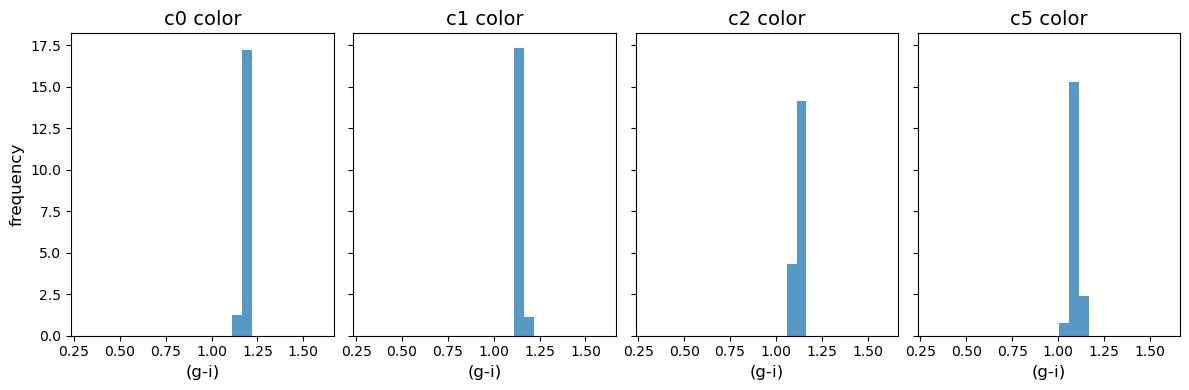

Text(0.5, 1.0, 'n4636 (g-i) color map')

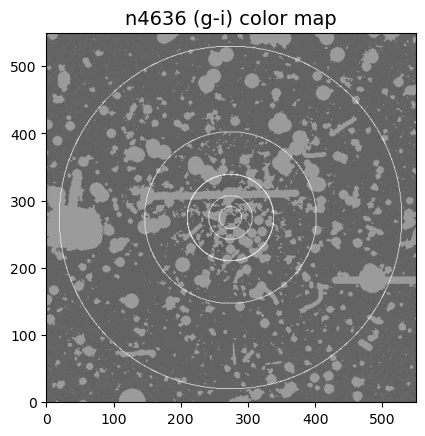

In [16]:
# Plot histograms of the color annuli
%matplotlib inline
tmpim0, _ = imOpen(outFolder+"tmpc0.fits")
im0 = tmpim0.flatten()
tmpim1, _ = imOpen(outFolder+"tmpc1.fits")
im1 = tmpim1.flatten()
tmpim2, _ = imOpen(outFolder+"tmpc2.fits")
im2 = tmpim2.flatten()
tmpim3, _ = imOpen(outFolder+"tmpc5.fits")
im3 = tmpim3.flatten()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, tight_layout=True, figsize=(12, 4))

ax1.hist(im0, bins=np.linspace(0.3,1.6,25), density=True, alpha=0.75)
ax1.set_xlabel("(g-i)", fontsize=12)
ax1.set_ylabel("frequency", fontsize=12)
ax1.set_title("c0 color", fontsize=14)

ax2.hist(im1, bins=np.linspace(0.3,1.6,25), density=True, alpha=0.75)
ax2.set_xlabel("(g-i)", fontsize=12)
ax2.set_title("c1 color", fontsize=14)

ax3.hist(im2, bins=np.linspace(0.3,1.6,25), density=True, alpha=0.75)
ax3.set_xlabel("(g-i)", fontsize=12)
ax3.set_title("c2 color", fontsize=14)

ax4.hist(im3, bins=np.linspace(0.3,1.6,25), density=True, alpha=0.75)
ax4.set_xlabel("(g-i)", fontsize=12)
ax4.set_title("c5 color", fontsize=14)

plt.show()

ax = plt.gca()
tv(outFolder+name+"gi.zoom.clr",ax=ax, options='0 5')
ax.set_title(name + " (g-i) color map", fontsize=14)

In [17]:
!cat monsta.log

 Galaxy: n4636
 SKYG    =   2.0612034131772816E-004
 SKYI    =   4.9509818200021982E-004
    
Unity = 0.005     Average radius =    24.5
Unity = 0.020     Average radius =    49.7
Unity = 0.109     Average radius =    98.3
Unity = 0.474     Average radius =   194.4
    
 n4636 median (g-i) extinction corrected
 MEDC0   =   1.1800467967987061     
 MEDC1   =   1.1494259834289551     
 MEDC2   =   1.1214857101440430     
 MEDC5   =   1.0923848152160645     
    
 MEDC0RMS=   9.0000629425048828E-003
 MEDC1RMS=   9.2511177062988281E-003
 MEDC2RMS=   1.2679338455200195E-002
 MEDC5RMS=   2.0533561706542969E-002
    
 MEDC0SIG=   1.3735033053074523E-002
 MEDC1SIG=   1.3900833745347641E-002
 MEDC2SIG=   1.6383394753881703E-002
 MEDC5SIG=   2.3006024349209227E-002
    
 n4636 average (g-i) extinction corrected
 AVC0    =   1.1805841922760010     
 AVC1    =   1.1501884460449219     
 AVC2    =   1.1210794448852539     
 AVC5    =   1.0915771722793579     
    
 AVC0RMS =   9.4226297868139491E-0

In [18]:
# print(name)
# !cat {json_name}

In [19]:
# clean up temporary display images
temp = outFolder+name+'*.zoom.*'
!rm {temp}
temp = outFolder+name+'*.nonan'
!rm {temp}
temp = outFolder+name+'*tempsky.resid'
!rm {temp}
temp = outFolder+name+'*tempcircle.mask'
!rm {temp}
!rm monsta.log
!rm monsta.pro
temp = outFolder+'tmpc*.fits'
!rm {temp}